# SiLa Model

### Import Library

In [57]:
import pandas as pd
import numpy as np
import os
import zipfile
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import json
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# Install gdown
!pip install -q gdown

### Load data dari Google Drive

In [58]:
# Download dataset.zip dari Google Drive
FILE_ID = "1MxfUU3zMAi6FmMfYoRWEDjAaqQM-bJqv"
!gdown --id $FILE_ID -O dataset.zip

# Ekstrak isi file ZIP ke folder 'dataset'
with zipfile.ZipFile("dataset.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")

# Cek isi folder dataset
print("File CSV di folder dataset:", os.listdir("dataset"))

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MxfUU3zMAi6FmMfYoRWEDjAaqQM-bJqv
To: /content/dataset.zip
100% 1.97M/1.97M [00:00<00:00, 16.8MB/s]
File CSV di folder dataset: ['Dataset A-Z & Space']


### Merge Data

In [59]:
folder_path = "/content/dataset/Dataset A-Z & Space"

def combine_all_csv(folder=folder_path):
    all_data = []
    # Urutkan nama file secara alfabetis (A.csv, B.csv, ..., Space.csv)
    for filename in sorted(os.listdir(folder)):
        if filename.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder, filename))
            all_data.append(df)
    data = pd.concat(all_data, ignore_index=True)
    return data

if __name__ == "__main__":
    data = combine_all_csv()
    print(data.head())
    print(f"Jumlah data total: {len(data)}")
    data.to_csv("dataset_all.csv", index=False)
    print("[INFO] Dataset gabungan disimpan sebagai dataset_all.csv")

         x0        y0        x2        y1        x4        y2        x6  \
0  0.670111  0.788078  0.619816  0.749713  0.581359  0.682733  0.556437   
1  0.670730  0.787477  0.621528  0.751015  0.583860  0.688991  0.559360   
2  0.704643  0.743894  0.653721  0.698068  0.615550  0.627945  0.585927   
3  0.702808  0.728826  0.654855  0.689337  0.617201  0.624085  0.586543   
4  0.714378  0.707554  0.668589  0.674648  0.632805  0.605429  0.603538   

         y3        x8        y4  ...       y16       x34       y17       x36  \
0  0.635558  0.526533  0.611390  ...  0.681058  0.708301  0.618711  0.687658   
1  0.641704  0.531904  0.618191  ...  0.677913  0.702993  0.640824  0.695329   
2  0.573259  0.555348  0.545557  ...  0.610873  0.733245  0.575161  0.724476   
3  0.568976  0.555549  0.541991  ...  0.608896  0.734127  0.563029  0.729305   
4  0.548430  0.568090  0.523241  ...  0.573897  0.743287  0.524850  0.742056   

        y18       x38       y19       x40       y20  label  
0  0.62

### Data Understanding

In [60]:
df_all = pd.read_csv("dataset_all.csv")
df_all.head()

,x0,y0,x2,y1,x4,y2,x6,y3,x8,y4,...,y16,x34,y17,x36,y18,x38,y19,x40,y20,label
0,0.670111,0.788078,0.619816,0.749713,0.581359,0.682733,0.556437,0.635558,0.526533,0.611390,...,0.681058,0.708301,0.618711,0.687658,0.625035,0.677573,0.665457,0.683257,0.677859,A
1,0.670730,0.787477,0.621528,0.751015,0.583860,0.688991,0.559360,0.641704,0.531904,0.618191,...,0.677913,0.702993,0.640824,0.695329,0.612936,0.680773,0.647638,0.681360,0.672102,A
2,0.704643,0.743894,0.653721,0.698068,0.615550,0.627945,0.585927,0.573259,0.555348,0.545557,...,0.610873,0.733245,0.575161,0.724476,0.560612,0.716595,0.596306,0.717277,0.606586,A
3,0.702808,0.728826,0.654855,0.689337,0.617201,0.624085,0.586543,0.568976,0.555549,0.541991,...,0.608896,0.734127,0.563029,0.729305,0.549194,0.718444,0.586771,0.717156,0.598900,A
4,0.714378,0.707554,0.668589,0.674648,0.632805,0.605429,0.603538,0.548430,0.568090,0.523241,...,0.573897,0.743287,0.524850,0.742056,0.522165,0.733242,0.560356,0.730363,0.569422,A


In [61]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      5400 non-null   float64
 1   y0      5400 non-null   float64
 2   x2      5400 non-null   float64
 3   y1      5400 non-null   float64
 4   x4      5400 non-null   float64
 5   y2      5400 non-null   float64
 6   x6      5400 non-null   float64
 7   y3      5400 non-null   float64
 8   x8      5400 non-null   float64
 9   y4      5400 non-null   float64
 10  x10     5400 non-null   float64
 11  y5      5400 non-null   float64
 12  x12     5400 non-null   float64
 13  y6      5400 non-null   float64
 14  x14     5400 non-null   float64
 15  y7      5400 non-null   float64
 16  x16     5400 non-null   float64
 17  y8      5400 non-null   float64
 18  x18     5400 non-null   float64
 19  y9      5400 non-null   float64
 20  x20     5400 non-null   float64
 21  y10     5400 non-null   float64
 22  

### Mengatasi Missing Values

In [62]:
df_all.isnull().sum()

,0
x0,0
y0,0
x2,0
y1,0
x4,0
y2,0
x6,0
y3,0
x8,0
y4,0


Tidak ada missing value

### Mengatasi data duplikat

In [63]:
print(f'Jumlah data duplikat:', df_all.duplicated().sum())

Jumlah data duplikat: 0


Tidak ada data duplikat

### Mengecek besaran data perlabel

<ipython-input-64-1158937009>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


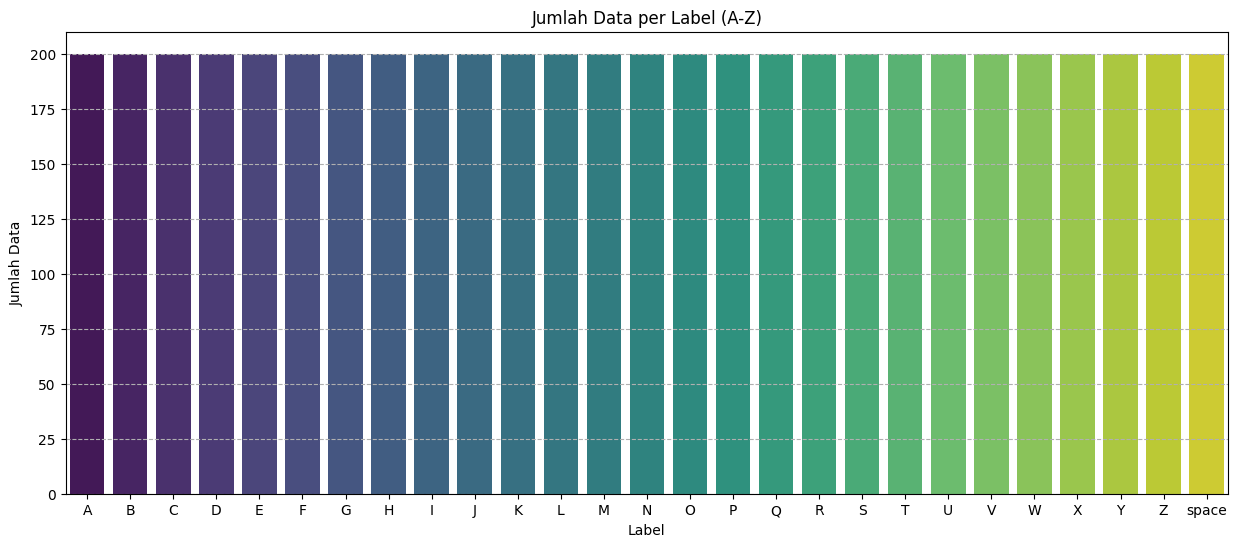

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' dataframe is already loaded and contains a 'label' column
if 'label' in data.columns:
    # Count the occurrences of each label
    label_counts = data['label'].value_counts().sort_index()

    # Create the visualization
    plt.figure(figsize=(15, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
    plt.title('Jumlah Data per Label (A-Z)')
    plt.xlabel('Label')
    plt.ylabel('Jumlah Data')
    plt.xticks(rotation=0) # Keep labels horizontal for clarity
    plt.grid(axis='y', linestyle='--')
    plt.show()
else:
    print("Kolom 'label' tidak ditemukan dalam dataframe.")

Pada visualisasi terlihat bahwa besaran data setiap label seimbang sebesar 200 data perlabel

### Split data dan menyimpan label

In [65]:
# Load dataset
data = pd.read_csv("dataset_all.csv")
X = data.drop("label", axis=1).values
y = data["label"].values

# Label Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Simpan label encoder ke file JSON
label_mapping = {label: int(idx) for idx, label in enumerate(le.classes_)}
with open("label.json", "w") as f:
    json.dump(label_mapping, f)
print("[INFO] label.json disimpan.")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

input_dim = X.shape[1]
num_classes = len(le.classes_)

[INFO] label.json disimpan.


### Modeling

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
history = model.fit(
    X_train, y_train,
    epochs=50, batch_size=32,
    validation_split=0.1, verbose=1
)

loss, acc = model.evaluate(X_test, y_test)
print(f"[RESULT] Akurasi pada data uji: {acc * 100:.2f}%")

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0584 - loss: 3.2551 - val_accuracy: 0.1921 - val_loss: 2.8262
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2411 - loss: 2.6788 - val_accuracy: 0.3681 - val_loss: 2.1498
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3658 - loss: 2.0241 - val_accuracy: 0.5648 - val_loss: 1.5324
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4803 - loss: 1.6252 - val_accuracy: 0.6435 - val_loss: 1.2974
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5576 - loss: 1.4152 - val_accuracy: 0.6620 - val_loss: 1.0642
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6362 - loss: 1.1505 - val_accuracy: 0.7523 - val_loss: 0.9117
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6509 - loss: 1.0874 - val_accuracy: 0.8264 - val_loss: 0.7923
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7091 - loss: 0.9263 - val_accuracy: 

### Evaluasi

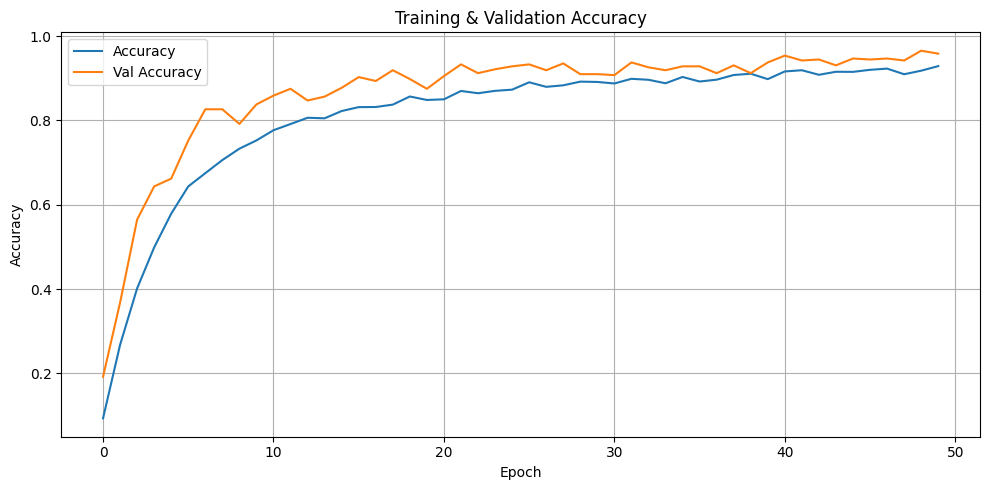

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

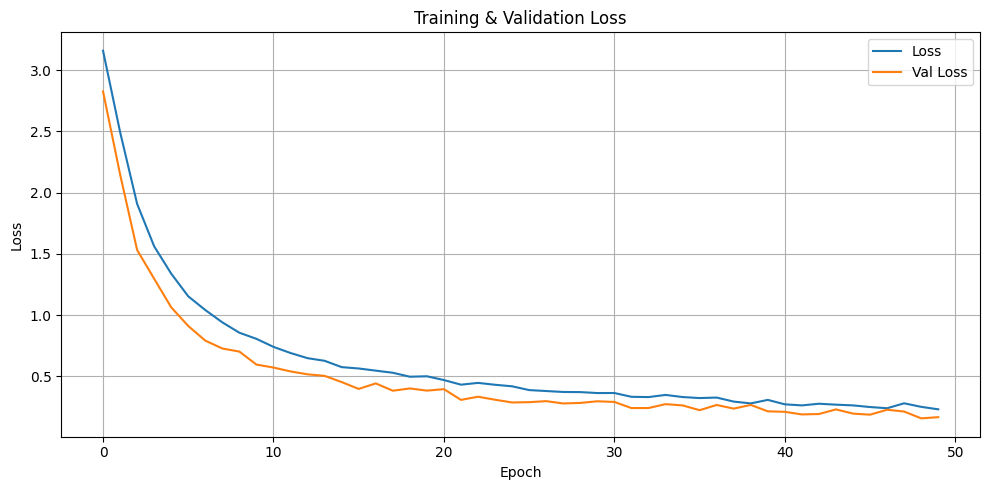

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


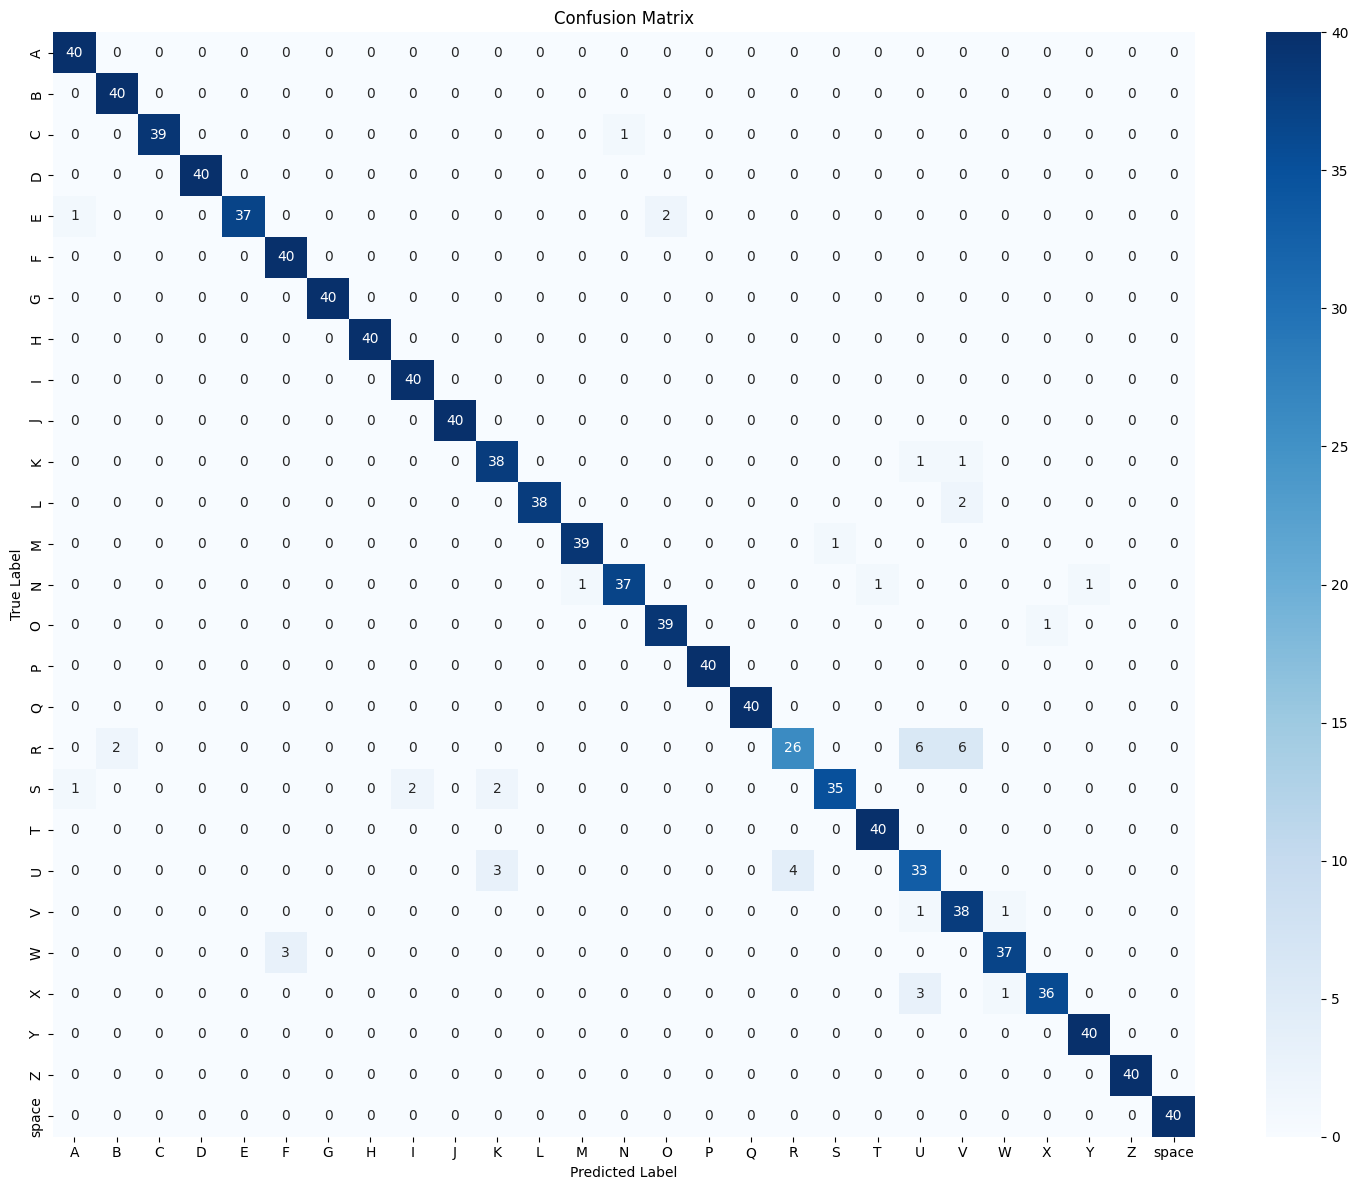

In [70]:
# Get predictions from the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the class labels from the LabelEncoder
class_labels = le.classes_

# Plot the confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [71]:
# Generate the classification report as a dictionary
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Convert to DataFrame dan bulatkan ke 2 angka desimal
report_df = pd.DataFrame(report).transpose().round(2)

# Tampilkan hasil
print("Classification Report:")
print(report_df)


Classification Report:
              precision  recall  f1-score  support
A                  0.95    1.00      0.98    40.00
B                  0.95    1.00      0.98    40.00
C                  1.00    0.98      0.99    40.00
D                  1.00    1.00      1.00    40.00
E                  1.00    0.92      0.96    40.00
F                  0.93    1.00      0.96    40.00
G                  1.00    1.00      1.00    40.00
H                  1.00    1.00      1.00    40.00
I                  0.95    1.00      0.98    40.00
J                  1.00    1.00      1.00    40.00
K                  0.88    0.95      0.92    40.00
L                  1.00    0.95      0.97    40.00
M                  0.98    0.98      0.98    40.00
N                  0.97    0.92      0.95    40.00
O                  0.95    0.98      0.96    40.00
P                  1.00    1.00      1.00    40.00
Q                  1.00    1.00      1.00    40.00
R                  0.87    0.65      0.74    40.00
S       

### Save Model to H5

In [72]:
model.save("gesture_mlp_model.h5")
print("[INFO] Model disimpan sebagai gesture_mlp_model.h5")

[INFO] Model disimpan sebagai gesture_mlp_model.h5
